In [3]:
import math
import matplotlib.pyplot as plt

# **Calculate Class 4**

The script obtains the effective properties for a Class 4 section for bi-simetric profile, based on:

- EN 1993-1-1
- EN 1993-1-5

We want to obtain → 

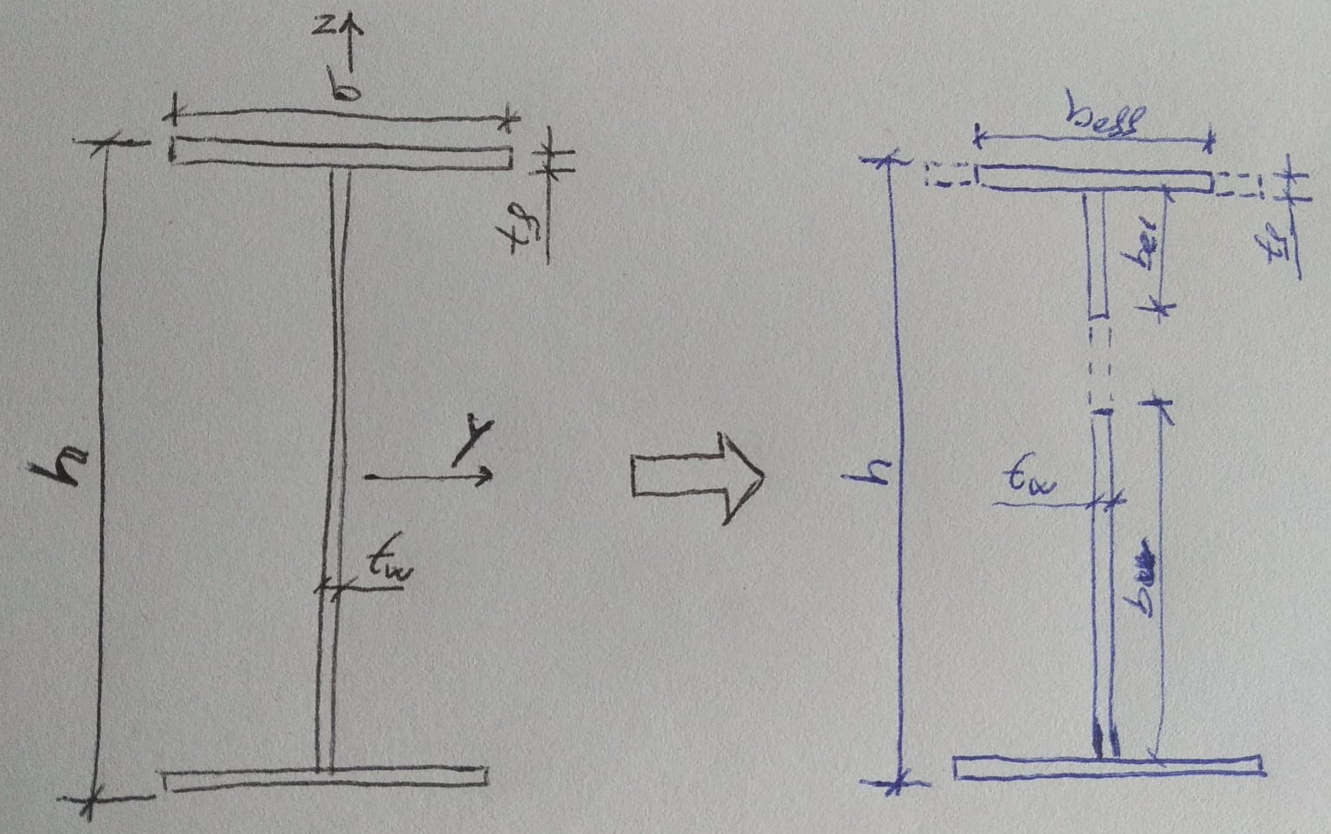

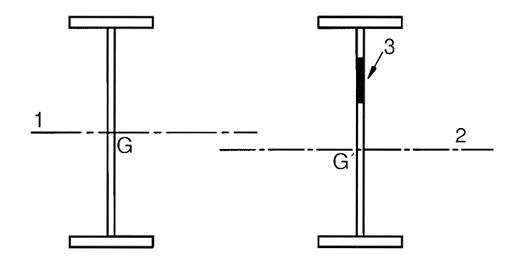

## **Gross Section Properties and Clasification**

- EN 1993-1-1 § Table 5.2

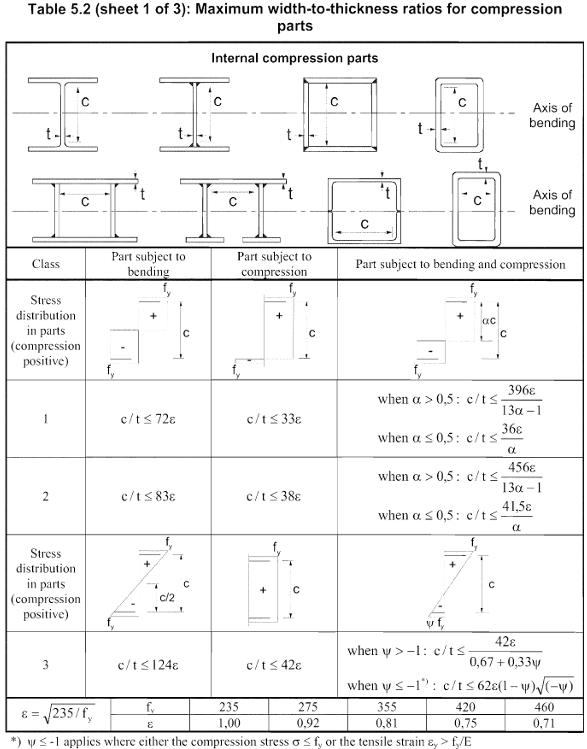 | 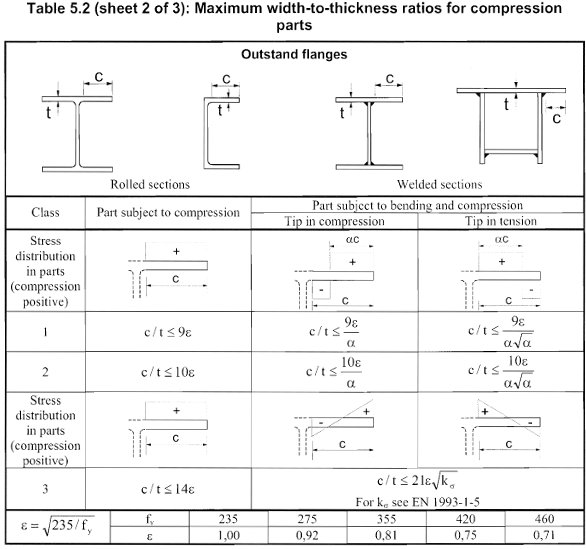

In [13]:
class Class4:
    def __init__(self, h, b, t_f, t_w, f_y, E=210000):
        self.h = h      # Total height [mm]
        self.b = b      # Flange Width [mm]
        self.t_f = t_f  # Flange thickness [mm]
        self.t_w = t_w  # Web thickness [mm]
        self.f_y = f_y  # Yield strength [N/mm²]
        self.E = E      # Young's modulus [N/mm²]
    
    def gross_section_properties(self):
        # area of members
        self.h_w = self.h - 2*self.t_f          # Web height [mm]
        web_area = self.h_w*self.t_w            # [mm²]
        flange_area = self.b * self.t_f         # [mm²]
        gross_area = web_area + 2*flange_area   # [mm²]
        
        # center of gravity
        self.cog_z = (flange_area*(self.t_f/2) + web_area*self.h/2 + flange_area*(self.h-self.t_f/2)) / gross_area
        
        # Second moment of area
        I_y_flange = (self.b * self.t_f**3)/12
        I_y_web = (self.t_w*self.h_w**3)/12
        d1 = abs(self.cog_z - self.t_w/2)   # distance from center of flange to the cdg
        d2 = abs(self.h - self.cog_z - self.t_f / 2)
        I_y_bruto = 2 * (I_y_flange + flange_area * d1**2) + I_y_web
        
        print(f'Gross Area = {gross_area:.2f} mm²')
        print(f'Center of gravity (z) = {self.cog_z:.2f} mm')
        print(f'Second moment of area (I_y) = {I_y_bruto} mm^4')
        
    def classification(self):
        λ_f = (self.b - self.t_w) / (2*self.t_f)
        λ_w = self.h_w / self.t_w
        ε = math.sqrt(235/self.f_y)
        
        # Flange class
        limit_class_1_flange = 9*ε
        limit_class_2_flange = 10*ε
        limit_class_3_flange = 14*ε
        
        if λ_f <= limit_class_1_flange:
            self.flange_class = 'Class 1'
        elif limit_class_1_flange < λ_f <= limit_class_2_flange:
            self.flange_class = 'Class 2'
        elif limit_class_2_flange < λ_f <= limit_class_3_flange:
            self.flange_class = 'Class 3'
        else:
            self.flange_class = 'Class 4'
        
        # Web class
        limit_class_1_web = 72*ε
        limit_class_2_web = 83*ε
        limit_class_3_web = 124*ε
        
        if λ_w <= limit_class_1_web:
            self.web_class = 'Class 1'
        elif limit_class_1_web < λ_w <= limit_class_2_web:
            self.web_class = 'Class 2'
        elif limit_class_2_web < λ_w <= limit_class_3_web:
            self.web_class = 'Class 3'
        else:
            self.web_class = 'Class 4'
            
        self.section_class = 'Class 4' if 'Clase 4' in [self.flange_class, self.web_class] else 'Class 3 or less'
        print(f'Flange class : {self.flange_class}')
        print(f'Web class : {self.web_class}')
        
    def plot_gross_section(self):
        fig, ax = plt.subplots(figsize=(6,10))
        
        # Gross Section
        ax.add_patch(plt.Rectangle((-self.b / 2, 0), self.b, self.t_f, color="lightblue"))
        ax.add_patch(plt.Rectangle((-self.t_w / 2, self.t_f), self.t_w, self.h_w, color="lightblue"))
        ax.add_patch(plt.Rectangle((-self.b / 2, self.h - self.t_f), self.b, self.t_f, color="lightblue"))
        
        # Add cdg
        ax.scatter(0, self.cog_z, color= 'red', s=100, label= 'Center Of Gravity')
        
        # Add dimensions
            # h
        ax.annotate("", xy=(-self.b/1.3, self.h), xytext=(-self.b/1.3, 0),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(-self.b/1.3 - 3, self.h/2, f'h = {self.h}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # b
        ax.text(30, self.h + 10, f'b = {self.b}', va='center', ha='right', fontsize=10, color='black')
            # h_w
        ax.annotate("", xy=(-self.b/2.2, self.h - self.t_f), xytext=(-self.b/2.2, self.t_f),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(-self.b/2.2 - 3, self.h/2, f'h_w = {self.h_w}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # t_w
        ax.text(self.b/5 - 20, self.t_f + self.h_w/1.5, f't_w = {self.t_w}', va='center', ha='left', fontsize=10, color='black')
            # t_f
        ax.text(-self.b/2 - 10, self.t_f/2 + 40, f't_f = {self.t_f}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # cog_z
        ax.annotate("", xy=(self.b/1.3, self.cog_z), xytext=(self.b/1.3, 0),
                    arrowprops=dict(arrowstyle='<->', color='red'))
        ax.text(self.b/1.3 -20, self.cog_z/2, f'COG(z) = {self.cog_z:.1f}', va='center', ha='left', fontsize=10, color='red', rotation = 90)
        
        # Graphic ajust
        ax.set_title("Gross Section\n")
        ax.set_xlim(-self.b, self.b)
        ax.set_ylim(0, self.h)
        ax.set_aspect("equal")
           
        plt.grid(True)
        plt.show()           

Gross Area = 10800.00 mm²
Center of gravity (z) = 508.00 mm
Second moment of area (I_y) = 1724145600.0 mm^4
Flange class : Class 4
Web class : Class 4


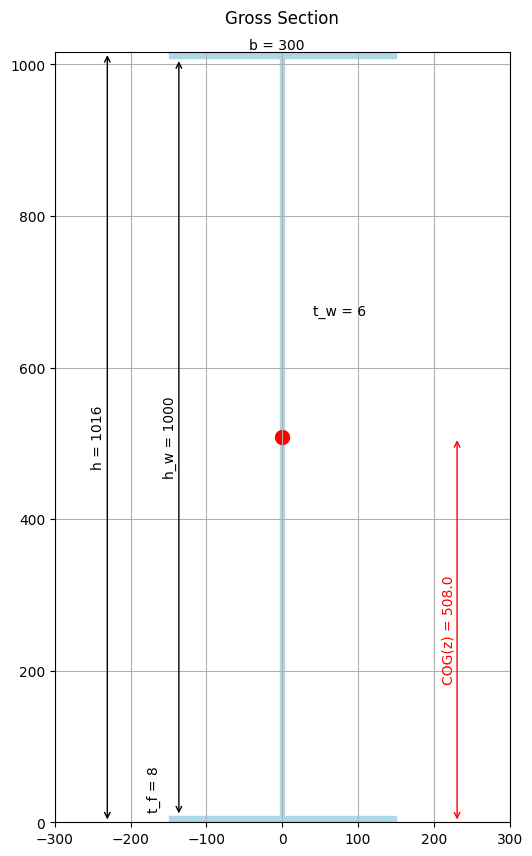

In [14]:
# Gross area test

section = Class4(h=1016, b=300, t_f=8, t_w=6, f_y=275)
section.gross_section_properties()
section.classification()
section.plot_gross_section()

## **Effective Section Properties**

- EN 1993-1-5 § Table 4.1 → webs

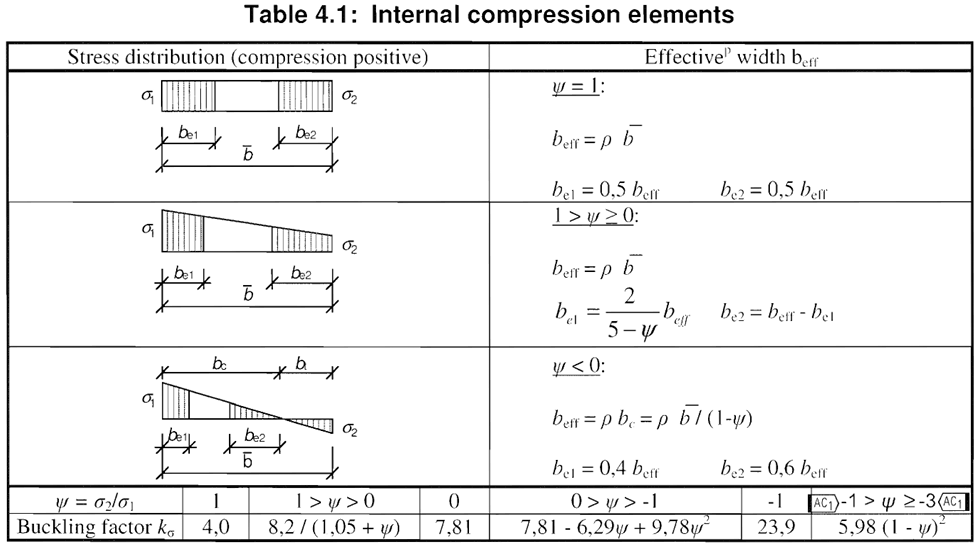  

- EN 1993-1-5 § Table 4.2 → flanges

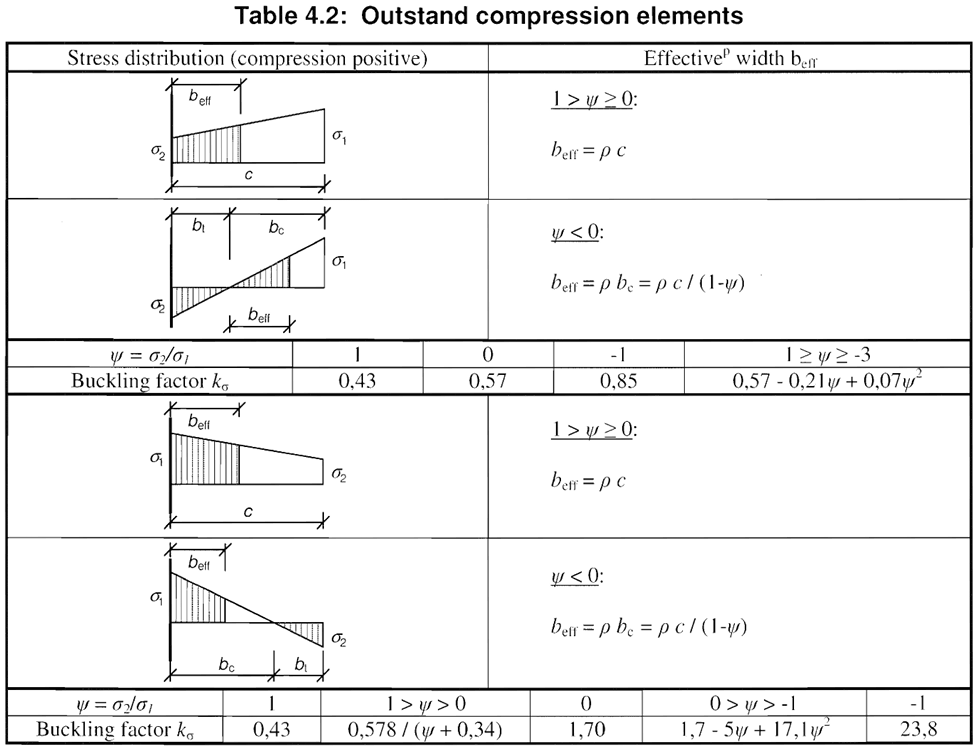 

In [15]:
class EffectiveSection(Class4):
    def __init__(self, h, b, t_f, t_w, f_y, E=210000):
        super().__init__(h, b, t_f, t_w, f_y, E)
        self.gross_section_properties()
        self.classification()
        
        # Verify if the class are valid
        if not hasattr(self, 'flange_class'):
            self.flange_class = 'Class 4'
        if not hasattr(self, 'web_class'):
            self.web_class = 'Class 4'
    
    def set_ψ_w(self, ψ_w):
        # You must determine the relationship between stresses
        if not -1 <= ψ_w <= 1:
            raise ValueError(f'The value of ψ_w = {self.ψ_w} is out of range')
        self.ψ_w = ψ_w
                    
    def effective_flange(self): # epending on ψ_w a flange could be whole or not 
        if self.flange_class == 'Class 4':
            c_f = (self.b-self.t_w)/2
            ε = math.sqrt(235/self.f_y)
            k_σ_f = 0.43        # The value is cte because the flange is always whole in compression or in tension
            λ_p_f = (c_f/self.t_f) / (28.4*ε*math.sqrt(k_σ_f))
            
            if λ_p_f <= 0.748:
                ρ_f = 1
            else:
                ρ_f = ((λ_p_f-0.188) / λ_p_f**2)
                
            if self.ψ_w == 1: # Pure compression → both flanges in compression
                self.b_eff_f = 2*c_f*ρ_f + self.t_w
                eff_area_top_flange = self.b_eff_f*self.t_f
                eff_area_bottom_flange = self.b_eff_f*self.t_f
            elif 1 > self.ψ_w >= 0: # Bending and compresion → both flanges in compression
                self.b_eff_f = 2*c_f*ρ_f + self.t_w
                eff_area_top_flange = self.b_eff_f*self.t_f
                eff_area_bottom_flange = self.b_eff_f*self.t_f
            elif 0 > self.ψ_w >= -1: # Bending and compresion → bottom flange in tension and top flange in compression
                self.b_eff_f = 2*c_f*ρ_f + self.t_w
                eff_area_top_flange = self.b_eff_f*self.t_f
                eff_area_bottom_flange = self.b*self.t_f
        else:
            self.b_eff_f = self.b
            eff_area_top_flange = self.b*self.t_f
            eff_area_bottom_flange = self.b*self.t_f
            
        print(f'b_eff= {self.b_eff_f:.2f} mm')
        print(f'Effective Area Top Flange = {eff_area_top_flange:.2f} mm²')
        print(f'Effective Area Bottom Flange = {eff_area_bottom_flange:.2f} mm²')
            
    def obtain_k_σ_w (self):
        if self.ψ_w == 1:
            return 4.0
        elif 1 > self.ψ_w > 0:
            return 8.2 / (1.05 + self.ψ_w)
        elif self.ψ_w == 0:
            return 7.81
        elif 0 > self.ψ_w > -1:
            return 7.81 - 6.29 * self.ψ_w + 9.78 * self.ψ_w**2
        elif self.ψ_w == -1:
            return 23.9
        else:
            raise ValueError(f'The value of ψ_w = {self.ψ_w} is out of range')
        
                
    def effective_web(self):
        if self.web_class == 'Class 4':
            h_w = self.h - 2*self.t_f
            ε = math.sqrt(235/self.f_y)
            k_σ_w = self.obtain_k_σ_w()
            λ_p_w = (h_w/self.t_w) / (28.4*ε*math.sqrt(k_σ_w))
            
            if λ_p_w <= (0.5 + math.sqrt(0.085 - 0.055*self.ψ_w)):
                ρ_w = 1
            else:
                ρ_w = ((λ_p_w - 0.055*(3+self.ψ_w)) / λ_p_w**2)
            
            # The web have a specific distribute geometry   
            if self.ψ_w == 1:
                self.h_eff_w = ρ_w*h_w
                self.b_e1 = 0.5 * self.h_eff_w
                self.b_e2 = 0.5 * self.h_eff_w
                self.b_w = self.b_e2
            elif 1 > self.ψ_w >= 0:
                self.h_eff_w = ρ_w*h_w
                self.b_e1 = (2*self.h_eff_w) / (5-self.ψ_w)
                self.b_e2 = self.h_eff_w - self.b_e1
                self.b_w = self.b_e2
            elif 0 > self.ψ_w >= -1:
                self.h_eff_w = (ρ_w*h_w) / (1-self.ψ_w)
                self.b_e1 = 0.4 * self.h_eff_w
                self.b_e2 = 0.6 * self.h_eff_w
                self.b_w = self.b_e2 + (h_w - (h_w/(1-self.ψ_w)))
            else:
                raise ValueError(f'The value of ψ_w = {self.ψ_w} is out of range')
    
        else:
            self.h_eff_w = self.h - 2*self.t_f 
        print(f'b_e1 = {self.b_e1:.2f} mm')
        print(f'b_w = {self.b_w:.2f} mm')
            
    def effective_section_properties (self):
        # Depending on the bending moment diagram, the effective flange could be either the lower flange or the upper flange
        if self.ψ_w == 1: # Pure compression → both flange in compression
            # Effective Area
            eff_area_top_flange = self.b_eff_f*self.t_f
            eff_area_bottom_flange = self.b_eff_f*self.t_f
            eff_area_web1 = self.b_e1*self.t_w
            eff_area_web2 = self.b_w*self.t_w
            eff_area_web = eff_area_web1 + eff_area_web2
            self.eff_area = eff_area_bottom_flange + eff_area_web + eff_area_top_flange
            
            # New Center Of Gravity
            self.cog_eff_z = (eff_area_bottom_flange*(self.t_f/2) + eff_area_web1*(self.h-(self.t_f+self.b_e1/2)) + eff_area_web2*(self.t_f+self.b_w/2) + eff_area_top_flange*(self.h-self.t_f/2)) / self.eff_area
            
            # Effective Second Moment of Area
            I_y_f_eff_bottom = (self.b_eff_f*self.t_f**3) / 12
            I_y_f_eff_top = (self.b_eff_f*self.t_f**3) / 12
            I_y_w_eff1 = (self.t_w*self.b_e1**3) / 12
            I_y_w_eff2 = (self.t_w*self.b_w**3) / 12
            d_eff_1 = abs(self.cog_eff_z - self.t_f/2)                      # Distance from the center of bottom flange to the Center Of Gravity
            d_eff_2 = abs(self.cog_eff_z - (self.b_w/2 + self.t_f))         # Distance from the center of the bottom part of the web to the Center Of Gravity
            d_eff_3 = abs(self.cog_eff_z-(self.h-self.t_f-self.b_e1/2))     # Distance from the center of the top of the web to the Center Of Gravity
            d_eff_4 = abs(self.cog_eff_z-(self.h-self.t_f/2))               # Distance from the center of the top flange to the Center Of Gravity
            self.I_y_eff = I_y_f_eff_bottom + eff_area_bottom_flange*d_eff_1**2 + I_y_w_eff2 + eff_area_web2*d_eff_2**2 + I_y_w_eff1 +  eff_area_web1*d_eff_3**2 + I_y_f_eff_top + eff_area_top_flange*d_eff_4**2
            
        elif 1 > self.ψ_w >= 0: # Bending and compresion → both flange in compression
            # Effective Area
            eff_area_top_flange = self.b_eff_f*self.t_f
            eff_area_bottom_flange = self.b_eff_f*self.t_f
            eff_area_web1 = self.b_e1*self.t_w
            eff_area_web2 = self.b_w*self.t_w
            eff_area_web = eff_area_web1 + eff_area_web2
            self.eff_area = eff_area_bottom_flange + eff_area_web + eff_area_top_flange
            
            # New Center Of Gravity
            self.cog_eff_z = (eff_area_bottom_flange*(self.t_f/2) + eff_area_web1*(self.h-(self.t_f+self.b_e1/2)) + eff_area_web2*(self.t_f+self.b_w/2) + eff_area_top_flange*(self.h-self.t_f/2)) / self.eff_area
            
            # Effective Second Moment of Area
            I_y_f_eff_bottom = (self.b_eff_f*self.t_f**3) / 12
            I_y_f_eff_top = (self.b_eff_f*self.t_f**3) / 12
            I_y_w_eff1 = (self.t_w*self.b_e1**3) / 12
            I_y_w_eff2 = (self.t_w*self.b_w**3) / 12
            d_eff_1 = abs(self.cog_eff_z - self.t_f/2)                      # Distance from the center of bottom flange to the Center Of Gravity
            d_eff_2 = abs(self.cog_eff_z - (self.b_w/2 + self.t_f))         # Distance from the center of the bottom part of the web to the Center Of Gravity
            d_eff_3 = abs(self.cog_eff_z-(self.h-self.t_f-self.b_e1/2))     # Distance from the center of the top of the web to the Center Of Gravity
            d_eff_4 = abs(self.cog_eff_z-(self.h-self.t_f/2))               # Distance from the center of the top flange to the Center Of Gravity
            self.I_y_eff = I_y_f_eff_bottom + eff_area_bottom_flange*d_eff_1**2 + I_y_w_eff2 + eff_area_web2*d_eff_2**2 + I_y_w_eff1 +  eff_area_web1*d_eff_3**2 + I_y_f_eff_top + eff_area_top_flange*d_eff_4**2
            
        elif 0 > self.ψ_w >= -1: # Bending and compresion → bottom flange in tension
            # Effective Area
            eff_area_top_flange = self.b_eff_f*self.t_f
            eff_area_bottom_flange = self.b*self.t_f
            eff_area_web1 = self.b_e1*self.t_w
            eff_area_web2 = self.b_w*self.t_w
            eff_area_web = eff_area_web1 + eff_area_web2
            self.eff_area = eff_area_bottom_flange + eff_area_web + eff_area_top_flange
            
            # New Center Of Gravity
            self.cog_eff_z = (eff_area_bottom_flange*(self.t_f/2) + eff_area_web1*(self.h-(self.t_f+self.b_e1/2)) + eff_area_web2*(self.t_f+self.b_w/2) + eff_area_top_flange*(self.h-self.t_f/2)) / self.eff_area
            
            # Effective Second Moment of Area
            I_y_f_eff_bottom = (self.b*self.t_f**3) / 12
            I_y_f_eff_top = (self.b_eff_f*self.t_f**3) / 12
            I_y_w_eff1 = (self.t_w*self.b_e1**3) / 12
            I_y_w_eff2 = (self.t_w*self.b_w**3) / 12
            d_eff_1 = abs(self.cog_eff_z - self.t_f/2)                      # Distance from the center of bottom flange to the Center Of Gravity
            d_eff_2 = abs(self.cog_eff_z - (self.b_w/2 + self.t_f))         # Distance from the center of the bottom part of the web to the Center Of Gravity
            d_eff_3 = abs(self.cog_eff_z-(self.h-self.t_f-self.b_e1/2))     # Distance from the center of the top of the web to the Center Of Gravity
            d_eff_4 = abs(self.cog_eff_z-(self.h-self.t_f/2))               # Distance from the center of the top flange to the Center Of Gravity
            self.I_y_eff = I_y_f_eff_bottom + eff_area_bottom_flange*d_eff_1**2 + I_y_w_eff2 + eff_area_web2*d_eff_2**2 + I_y_w_eff1 +  eff_area_web1*d_eff_3**2 + I_y_f_eff_top + eff_area_top_flange*d_eff_4**2

        else:
            raise ValueError(f'The value of ψ_w = {self.ψ_w} is out of range')
        
        print(f'Effective Area = {self.eff_area:.2f} mm²')
        print(f'Effective Center Of Gravity (z)= {self.cog_eff_z:.2f} mm')
        print(f'Effective Second Moment of Area = {self.I_y_eff:.2f} mm^4')
        """print(f'd_eff1 = {d_eff_1:.2f}')
        print(f'd_eff2 = {d_eff_2:.2f}')
        print(f'd_eff3 = {d_eff_3:.2f}')
        print(f'd_eff4 = {d_eff_4:.2f}')""" 'Check it'
    
    def plot_effective_section(self):
        fig, ax = plt.subplots(figsize=(6,10))
        
        # Effective Section
        if self.ψ_w == 1:
            ax.add_patch(plt.Rectangle((-self.b_eff_f/2, 0), self.b_eff_f, self.t_f, color="lightgreen"))   # bottom flange
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.t_f), self.t_w, self.b_w, color="lightgreen"))    # bottom web
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.h - self.t_f - self.b_e1), self.t_w, self.b_e1, color="lightgreen"))    # top web
            ax.add_patch(plt.Rectangle((-self.b_eff_f/2, self.h - self.t_f), self.b_eff_f, self.t_f, color="lightgreen"))   # top_flange   
            
        elif 1 > self.ψ_w >= 0:
            ax.add_patch(plt.Rectangle((-self.b_eff_f/2, 0), self.b_eff_f, self.t_f, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.h - self.t_f - self.b_e1), self.t_w, self.b_e1, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.t_f), self.t_w, self.b_w, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.b_eff_f/2, self.h - self.t_f), self.b_eff_f, self.t_f, color="lightgreen"))
        
        elif 0 > self.ψ_w >= -1:
            ax.add_patch(plt.Rectangle((-self.b/2, 0), self.b, self.t_f, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.h - self.t_f - self.b_e1), self.t_w, self.b_e1, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.t_w/2, self.t_f), self.t_w, self.b_w, color="lightgreen"))
            ax.add_patch(plt.Rectangle((-self.b_eff_f/2, self.h - self.t_f), self.b_eff_f, self.t_f, color="lightgreen"))
            
            
        
        # Add cdg
        ax.scatter(0, self.cog_eff_z, color= 'red', s=100, label= 'Center Of Gravity')
        
        # Add dimensions
            # h
        ax.annotate("", xy=(-self.b/1.3, self.h), xytext=(-self.b/1.3, 0),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(-self.b/1.3 - 3, self.h/2, f'h = {self.h}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # b_top
        ax.text(self.b/2 -60, self.h + 15, f'b_top = {self.b_eff_f:.2f}', va='center', ha='right', fontsize=10, color='black')
            # b_bottom → need some conditions based on ψ_w
        if self.ψ_w == 1:
            self.b_bottom = self.b_eff_f
        elif 1 > self.ψ_w >= 0:
            self.b_bottom = self.b_eff_f
        elif 0 > self.ψ_w >= -1:
            self.b_bottom = self.b
                        
        ax.text(30, self.t_f + 15, f'b_bottom = {self.b_bottom:.2f}', va='center', ha='right', fontsize=10, color='black')
        
            # h_w
        ax.annotate("", xy=(-self.b/1.8, self.h - self.t_f), xytext=(-self.b/1.8, self.t_f),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(-self.b/1.8 - 3, self.h/2, f'h_w = {self.h_w}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # b_e1
        ax.annotate("", xy=(self.b/3.5, self.h - self.t_f), xytext=(self.b/3.5, self.h - (self.t_f + self.b_e1)),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(self.b/3.5 - 10, self.h - (self.t_f + self.b_e1/2), f'b_e1 = {self.b_e1:.2f}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # b_w
        ax.annotate("", xy=(self.b/3.5, self.t_f), xytext=(self.b/3.5, self.b_w),
                    arrowprops=dict(arrowstyle='<->', color='black'))
        ax.text(self.b/3.5 - 10, self.b_w/2, f'b_w = {self.b_w:.2f}', va='center', ha='right', fontsize=10, color='black', rotation = 90)
            # t_w
        ax.text(-self.b/2 + 70, self.h -100, f't_w = {self.t_w}', va='center', ha='left', fontsize=10, color='black')   
            # t_f 
        ax.text(self.b/2 + 50, self.h - self.t_f/2 -10, f't_f = {self.t_f}', va='center', ha='right', fontsize=10, color='black')
            # cog_z
        ax.annotate("", xy=(self.b/1.3, self.cog_eff_z), xytext=(self.b/1.3, 0),
                    arrowprops=dict(arrowstyle='<->', color='red'))
        ax.text(self.b/1.3 -20, self.cog_eff_z/2, f'COG(z) = {self.cog_eff_z:.1f}', va='center', ha='left', fontsize=10, color='red', rotation = 90)
        
        # Graphic ajust
        ax.set_title(f"Effective Section for ψ_w={self.ψ_w}\n")
        ax.set_xlim(-self.b, self.b)
        ax.set_ylim(0, self.h)
        ax.set_aspect("equal")
           
        plt.grid(True)
        plt.show()      
           

Gross Area = 10800.00 mm²
Center of gravity (z) = 508.00 mm
Second moment of area (I_y) = 1724145600.0 mm^4
Flange class : Class 4
Web class : Class 4
b_eff= 232.93 mm
Effective Area Top Flange = 1863.45 mm²
Effective Area Bottom Flange = 2400.00 mm²
b_e1 = 140.97 mm
b_w = 711.45 mm
Effective Area = 9378.00 mm²
Effective Center Of Gravity (z)= 452.23 mm
Effective Second Moment of Area = 1480191628.24 mm^4


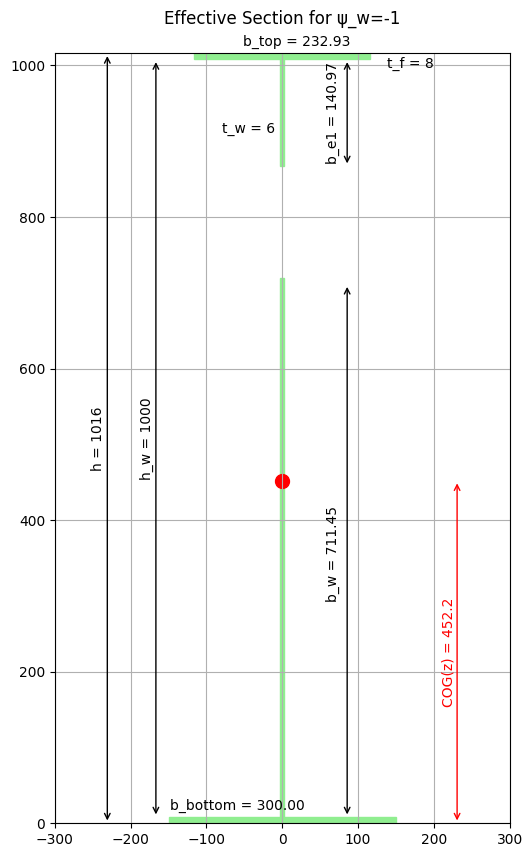

In [16]:
# Effective area test

section = EffectiveSection(h=1016, b=300, t_f=8, t_w=6, f_y=275)
section.set_ψ_w(ψ_w=-1)
section.effective_flange()
section.obtain_k_σ_w()
section.effective_web()
section.effective_section_properties()
section.plot_effective_section()

## **Next Updates**

- Include a stress law diagram and do the force balance of the section

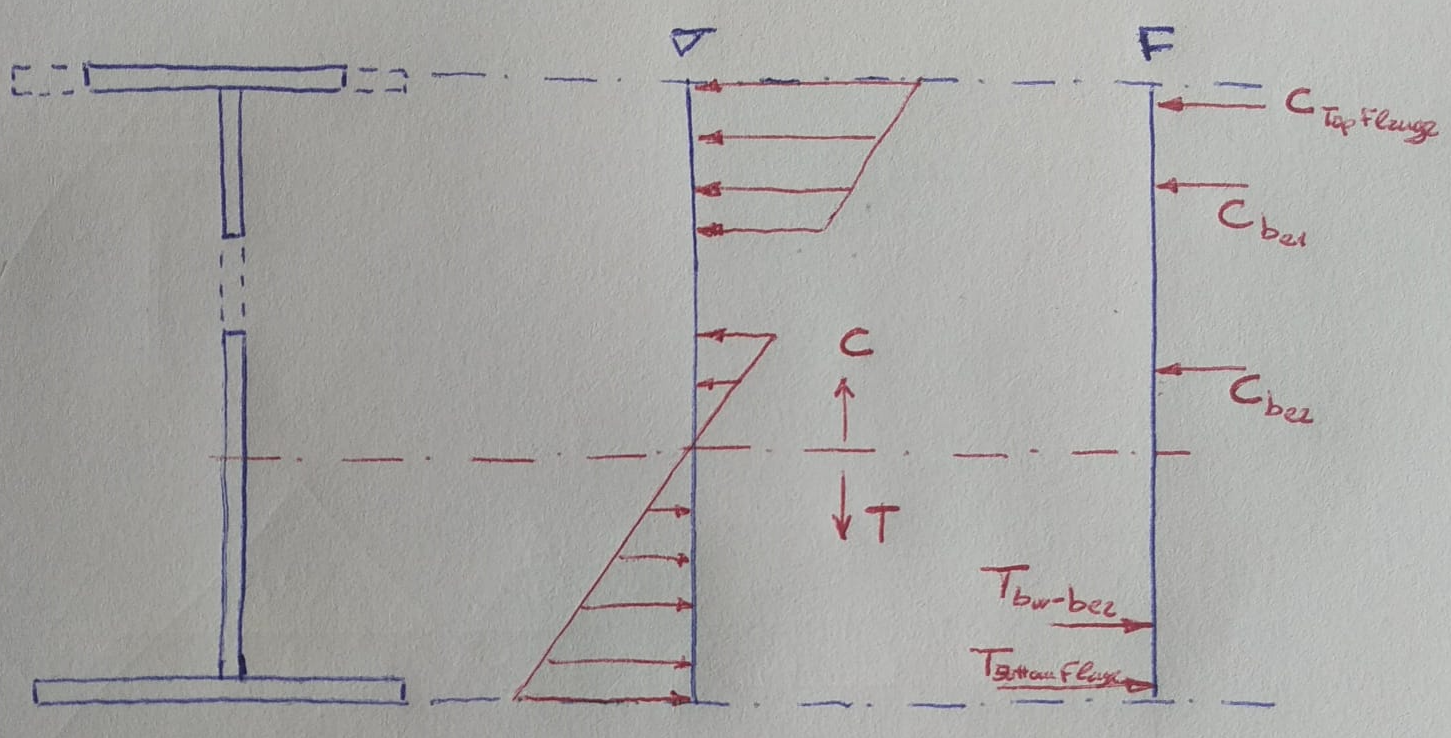


- Include welding geometry

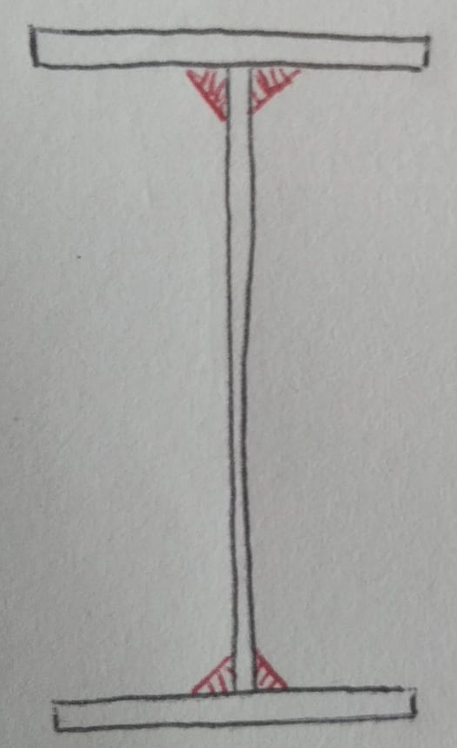
